In [1]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

%matplotlib inline

#Scaler
from sklearn.preprocessing import StandardScaler
#data split
from sklearn.model_selection import train_test_split#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz
import graphviz

#주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm


#회귀 분석
from sklearn.linear_model import LinearRegression
#후진제거법
from sklearn.feature_selection import RFE

#예측
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 Gradient
from sklearn.ensemble import GradientBoostingRegressor
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#회귀분석
from statsmodels.formula.api import ols
#선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score#분류
#로지스틱 회귀
from statsmodels.api import Logit
#의사결정나무
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
#그래디언트부스트
from sklearn.ensemble import GradientBoostingClassifier
#엑스지부스트
from xgboost import XGBClassifier
from xgboost import plot_importance
#SVM
from sklearn.svm import SVC
#분류 NN (MLP)
from sklearn.neural_network import MLPClassifier
#KNN 분류
from sklearn.neighbors import KNeighborsClassifier#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc#사용할 함수 선언#RSME: root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))#MAPE: mean absolutre percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100#XG Boost에서 사용할 정확도 표현 함수
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬 \n',confusion, '\n')
    print('정확도: ', accuracy)
    print('정밀도: ', precesion)
    print('재현율: ', recall)
    print('F1: ', F1)
    print('AUC: ', AUC)

import warnings

warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
font_fname = "c:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_fname, size=18).get_name()
matplotlib.rc('font',family= fontprop)
matplotlib.rc('axes',unicode_minus=False)

# 데이터 읽기

In [2]:
df_raw = pd.read_csv("C:/Users/osoomin/Desktop/Tel/tele_customer_final.csv")
df_raw = df_raw.drop(['Unnamed: 0','AgeGroup','StartDate','EndDate','EndDateTmp','ChurnCategory',
                       'ChurnReason','TotalRoamCharge','Sum_charge','ReasonCategory'],axis = 1)

df_raw['ChurnLabel'] = df_raw['ChurnLabel'].replace({'Yes': 1, 'No': 0})
df_raw.head() 

,CustomerId,Gender,Age,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,PaymentMethod,...,UnlimitedData,AvgDownloadGB,ChurnLabel,ChurnScore,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,Tenure_month,Monthly_charge
0,C-10001,여성,37,Yes,No,0,Yes,2,Yes,신용카드,...,Yes,16,0,65,2205,3,0,47910,21.0,83590.0
1,C-10002,남성,46,No,No,0,No,0,No,신용카드,...,No,10,0,66,5414,5,11300,12090,21.0,68929.0
2,C-10003,남성,50,No,No,0,No,0,Yes,계좌이체,...,Yes,30,1,71,4479,1,0,38080,5.0,98180.0
3,C-10004,남성,78,Yes,No,0,Yes,1,Yes,계좌이체,...,Yes,4,1,99,3714,1,0,31410,14.0,112743.0
4,C-10005,여성,75,Yes,No,0,Yes,3,Yes,신용카드,...,Yes,11,1,68,3464,1,0,8360,4.0,94500.0


In [3]:
df_raw_ch = df_raw[['CustomerId','Age','Dependents','noReferrals','PaymentMethod','OnlineSecurity',
                    'OnlineBackup','TechSupport','UnlimitedData','AvgDownloadGB','ChurnLabel',
                    'CustomerLTV','Monthly_charge','AvgRoamCharge']]

<AxesSubplot:>

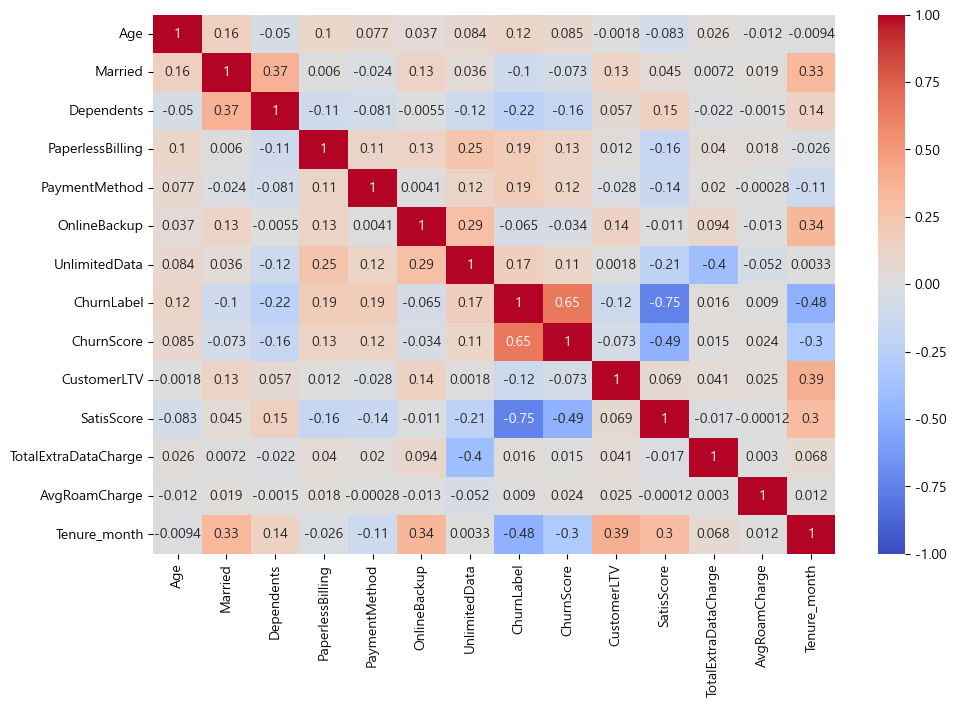

In [4]:
df_raw_c = df_raw.copy()

# df_raw_c['Gender'] = df_raw['Gender'].replace({'남성': 1, '여성': 0})
df_raw_c['Married'] = df_raw['Married'].replace({'Yes': 1, 'No': 0})
df_raw_c['Dependents'] = df_raw['Dependents'].replace({'Yes': 1, 'No': 0})
df_raw_c['Referrals'] = df_raw['Referrals'].replace({'Yes': 1, 'No': 0})
df_raw_c['PaperlessBilling'] = df_raw['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df_raw_c['PaymentMethod'] = df_raw['PaymentMethod'].replace({'신용카드': 0, '계좌이체': 1, '이체/메일확인':2})
df_raw_c['OnlineSecurity'] = df_raw['OnlineSecurity'].replace({'Yes': 1, 'No': 0})
df_raw_c['OnlineBackup'] = df_raw['OnlineBackup'].replace({'Yes': 1, 'No': 0})
df_raw_c['TechSupport'] = df_raw['TechSupport'].replace({'Yes': 1, 'No': 0})
df_raw_c['UnlimitedData'] = df_raw['UnlimitedData'].replace({'Yes': 1, 'No': 0})

df_raw_c = df_raw_c.drop(['Monthly_charge','AvgDownloadGB','noDependents','noReferrals','Referrals','TechSupport','OnlineSecurity'],axis = 1)

plt.figure(figsize=(11,7))
sns.heatmap(df_raw_c.corr(),vmin=-1.0, vmax=1.0,annot=True, cmap="coolwarm")

# 새롭게 산출된 Data

In [5]:
df_raw_ch = df_raw[['CustomerId','Age','Dependents','noReferrals','PaymentMethod','OnlineSecurity',
                    'OnlineBackup','TechSupport','UnlimitedData','AvgDownloadGB','ChurnLabel',
                    'CustomerLTV','Monthly_charge','AvgRoamCharge']]

## SatisScore는 상관관계가 0.7 이상이라 제외함. 
## 추천시스템을 위한 데이터 생성에 필요한 데이터라 df_raw_ch를 미리 만들어둠
df_raw_choose = df_raw_ch.drop(['CustomerId'],axis=1)
df = df_raw_choose.copy()
df_raw_choose.head()

,Age,Dependents,noReferrals,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge
0,37,No,2,신용카드,No,Yes,Yes,Yes,16,0,2205,83590.0,47910
1,46,No,0,신용카드,No,No,No,No,10,0,5414,68929.0,12090
2,50,No,0,계좌이체,No,No,No,Yes,30,1,4479,98180.0,38080
3,78,No,1,계좌이체,No,Yes,No,Yes,4,1,3714,112743.0,31410
4,75,No,3,신용카드,No,No,Yes,Yes,11,1,3464,94500.0,8360


In [6]:
#get dummy
df_raw_choose_dummy = pd.get_dummies(df_raw_choose)
df_raw_choose_dummy.head()

,Age,noReferrals,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge,Dependents_No,Dependents_Yes,PaymentMethod_계좌이체,PaymentMethod_신용카드,PaymentMethod_이체/메일확인,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,UnlimitedData_No,UnlimitedData_Yes
0,37,2,16,0,2205,83590.0,47910,1,0,0,1,0,1,0,0,1,0,1,0,1
1,46,0,10,0,5414,68929.0,12090,1,0,0,1,0,1,0,1,0,1,0,1,0
2,50,0,30,1,4479,98180.0,38080,1,0,1,0,0,1,0,1,0,1,0,0,1
3,78,1,4,1,3714,112743.0,31410,1,0,1,0,0,1,0,0,1,1,0,0,1
4,75,3,11,1,3464,94500.0,8360,1,0,0,1,0,1,0,1,0,0,1,0,1


In [7]:
df_train, df_test = train_test_split(df_raw_choose_dummy, test_size = 0.2, random_state = 42)
x = df_train.drop(["ChurnLabel"], axis = 1, inplace = False) #목표변수 외
y = df_train["ChurnLabel"] #목표변수
test = df_test.copy()
test = test.drop(['ChurnLabel'],axis=1)

#더미화한 변수를 train set과 test(valid) set으로 분리한다
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

print("분할 전 설명변수 데이터 :", x.shape)
print('*'*40)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n분할 후 valid 데이터", df_test_x.shape)
print("분할 후 test 데이터 :", test.shape)
print('*'*40)
print('*'*40)
print("분할 전 목표변수 데이터 :", y.shape)
print("분할 후 목표변수 데이터 :", df_train_y.shape, "\n valid", df_test_y.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (5490, 19)
****************************************
분할 후 설명변수 데이터 : (3843, 19) 
분할 후 valid 데이터 (1647, 19)
분할 후 test 데이터 : (1373, 19)
****************************************
****************************************
분할 전 목표변수 데이터 : (5490,)
분할 후 목표변수 데이터 : (3843,) 
 valid (1647,)


# XGBoost

In [8]:
#모델 생성
#그래디언트 부스팅 모델 생성
xg_uncustomized = XGBClassifier(random_state = 42)
xg_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set:', xg_uncustomized.score(df_train_x,df_train_y))
print('Accuracy on test set:', xg_uncustomized.score(df_test_x,df_test_y))

Accuracy on training set: 0.9924538121259433
Accuracy on test set: 0.7972070431086824


In [9]:
#x별 정확도 그래프로 확인
def show_plot(para,x):
    plt.figure(figsize=(6,4))
    plt.plot(para, train_accuracy, linestyle = "-", label = 'Train Accuracy')
    plt.plot(para, test_accuracy, linestyle = "--", label = 'Test Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel(x) ; plt.legend() ; plt.show()

    LearningRate  TrainAccuracy  TestAccuracy
0           0.01          0.826         0.803
1           0.02          0.836         0.806
2           0.03          0.843         0.806
3           0.04          0.851         0.806
4           0.05          0.865         0.806
5           0.06          0.878         0.801
6           0.07          0.890         0.806
7           0.08          0.900         0.800
8           0.09          0.909         0.799
9           0.10          0.916         0.803
10          0.11          0.932         0.794
11          0.12          0.936         0.796
12          0.13          0.946         0.795
13          0.14          0.940         0.785
14          0.15          0.950         0.795
15          0.16          0.956         0.797
16          0.17          0.961         0.784
17          0.18          0.963         0.795
18          0.19          0.968         0.785


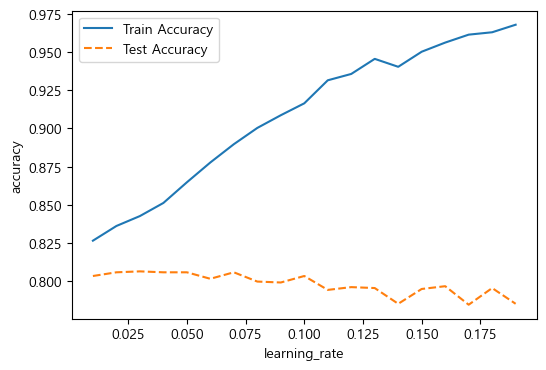

None


In [20]:
#학습률 조정
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#learning_rate 학습률 변경
para_lr = [lr * 0.01 for lr in range(1,20)]

for v_learning_rate in para_lr:
    xg = XGBClassifier(learning_rate = v_learning_rate, random_state = 42)
    xg.fit(df_train_x, df_train_y)
    train_accuracy.append(xg.score(df_train_x,df_train_y))
    test_accuracy.append(xg.score(df_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy
#LearningRate 별 정확도 테이블
print(df_accuracy_lr.round(3))
print(show_plot(para_lr,'learning_rate'))

In [10]:
learning_rate = 0.07

    Estimators  TrainAccuracy  TestAccuracy
0            2          0.806         0.794
1            4          0.816         0.800
2            6          0.819         0.803
3            8          0.822         0.801
4           10          0.824         0.800
5           12          0.825         0.800
6           14          0.825         0.805
7           16          0.828         0.804
8           18          0.829         0.804
9           20          0.832         0.805
10          22          0.833         0.807
11          24          0.834         0.808
12          26          0.834         0.808
13          28          0.836         0.808
14          30          0.836         0.808
15          32          0.838         0.806
16          34          0.840         0.803
17          36          0.840         0.806
18          38          0.841         0.804
19          40          0.843         0.805
20          42          0.844         0.803
21          44          0.846   

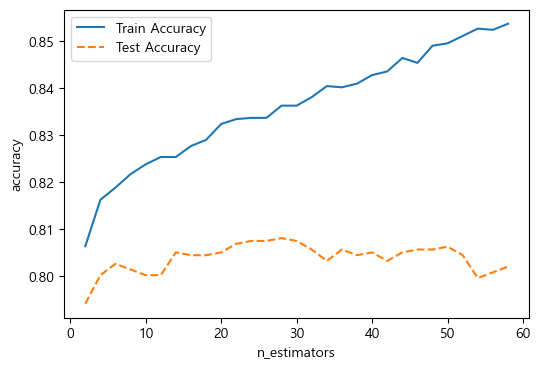

None


In [27]:
#트리 수 조정
train_accuracy = [] ; test_accuracy = []
para_n_tree = [n_tree*2 for n_tree in range(1,30)]

for v_n_estimators in para_n_tree:
    xg = XGBClassifier(n_estimators = v_n_estimators,learning_rate = learning_rate,
                       random_state = 42)
    xg.fit(df_train_x, df_train_y)
    train_accuracy.append(xg.score(df_train_x,df_train_y))
    test_accuracy.append(xg.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
# n_estimators 정확도 테이블
print(df_accuracy_n.round(3))
print(show_plot(para_n_tree,'n_estimators'))

In [11]:
#트리 수 지정
n_estimators = 32

    Depth  TrainAccuracy  TestAccuracy
0       1          0.753         0.760
1       2          0.754         0.760
2       3          0.799         0.799
3       4          0.812         0.805
4       5          0.826         0.809
5       6          0.838         0.806
6       7          0.859         0.793
7       8          0.878         0.798
8       9          0.897         0.792
9      10          0.920         0.789
10     11          0.940         0.783
11     12          0.950         0.790
12     13          0.966         0.789
13     14          0.974         0.784
14     15          0.978         0.786
15     16          0.978         0.786
16     17          0.981         0.790
17     18          0.980         0.788
18     19          0.982         0.789
19     20          0.981         0.790


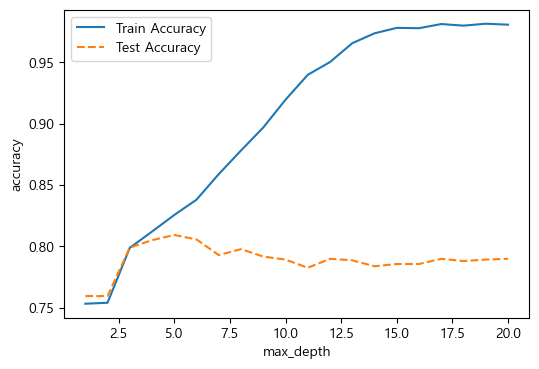

None


In [29]:
#train 및 test 정확도 결과 저장용
train_accuracy = [] ; test_accuracy = []
#max_depth: 최대 깊이 변경 1~10
para_depth = [depth for depth in range(1,21)]

for v_max_depth in para_depth:
    xg = XGBClassifier(max_depth = v_max_depth, n_estimators = n_estimators,
                       learning_rate = learning_rate, random_state = 42)
    xg.fit(df_train_x, df_train_y)
    train_accuracy.append(xg.score(df_train_x,df_train_y))
    test_accuracy.append(xg.score(df_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
#max_depth별 정확도 테이블
print(df_accuracy_depth.round(3))
print(show_plot(para_depth,'max_depth'))

In [12]:
max_depth = 5

In [13]:
xg_final = XGBClassifier(max_depth = max_depth,n_estimators = n_estimators,
                         learning_rate = learning_rate, random_state = 42)
xg_final.fit(df_train_x, df_train_y)
y_pred = xg_final.predict(df_test_x)
y_pred1 = xg_final.predict(test)
print('train set 정확성:', xg_final.score(df_train_x, df_train_y))
print('valid set 정확성:', xg_final.score(df_test_x, df_test_y))
print('test set 정확성:', xg_final.score(test, df_test['ChurnLabel']))
print('*'*40)
# print('Confusion Matrix:\n', confusion_matrix(df_test_y, y_pred))
print('Confusion Matrix:\n', confusion_matrix(df_test['ChurnLabel'], y_pred1))

train set 정확성: 0.8256570387717929
valid set 정확성: 0.8093503339404978
test set 정확성: 0.8128186453022578
****************************************
Confusion Matrix:
 [[945  70]
 [187 171]]


In [43]:
from sklearn.model_selection import KFold, cross_val_score

xg = XGBClassifier(max_depth = max_depth,n_estimators = n_estimators,
                   learning_rate = learning_rate, random_state = 42)

print("**************** K-Fold ****************")
for i in range(1,10):
    kfold = KFold(n_splits=i*5, shuffle=True, random_state=42)
    scores = cross_val_score(xg, x, y, cv=kfold)
    print("Accuracy (splits: %0.0f): %0.2f (+/- %0.2f)" % (i*5,scores.mean(), scores.std() * 2))

**************** K-Fold ****************
Accuracy (splits: 5): 0.80 (+/- 0.02)
Accuracy (splits: 10): 0.81 (+/- 0.03)
Accuracy (splits: 15): 0.81 (+/- 0.04)
Accuracy (splits: 20): 0.80 (+/- 0.05)
Accuracy (splits: 25): 0.81 (+/- 0.06)
Accuracy (splits: 30): 0.81 (+/- 0.06)
Accuracy (splits: 35): 0.81 (+/- 0.06)
Accuracy (splits: 40): 0.81 (+/- 0.07)
Accuracy (splits: 45): 0.81 (+/- 0.07)


# 이탈하지 않는 고객 중 이탈할 고객 예측하기

In [164]:
df_raw_chosen = df_raw_choose[df_raw_choose['ChurnLabel'] == 0]
df_raw_chosen_dummy = pd.get_dummies(df_raw_chosen)

df_raw_chosen_sa = df_raw_ch[df_raw_ch['ChurnLabel'] == 0]

In [165]:
df_raw_chosen.shape

(5161, 13)

In [166]:
df_raw_chosen_x = df_raw_chosen_dummy.drop(["ChurnLabel"], axis = 1, inplace = False) #목표변수 외
df_raw_chosen_y = df_raw_chosen_dummy["ChurnLabel"] #목표변수

## 이탈 여부를 확인을 위한 y_predict

In [167]:
#최종 모델을 이용하여 이탈하지 않는 고객 중 이탈할 고객 예측하기
y_predict = xg_final.predict(df_raw_chosen_x)

In [168]:
print('정확성:', xg_final.score(df_raw_chosen_x, df_raw_chosen_y))
print('Confusion Matrix:\n', confusion_matrix(df_raw_chosen_y, y_predict))

정확성: 0.935283859717109
Confusion Matrix:
 [[4827  334]
 [   0    0]]


In [169]:
v_feature_name = df_train_x.columns
# 변수중요도
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = xg_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
11,OnlineSecurity_No,0.186
1,noReferrals,0.170
15,TechSupport_No,0.139
2,AvgDownloadGB,0.096
9,PaymentMethod_신용카드,0.095
6,Dependents_No,0.079
4,Monthly_charge,0.054
13,OnlineBackup_No,0.053
17,UnlimitedData_No,0.031
8,PaymentMethod_계좌이체,0.026


Text(0, 0.5, '변수')

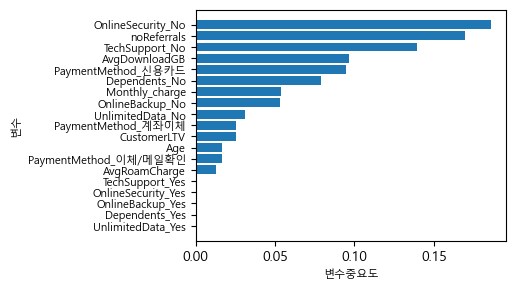

In [170]:
df_imp=df_importance
df_imp.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_imp))
plt.figure(figsize=(4,3))
plt.barh(y=coordinates, width=df_imp['Importance'])
plt.yticks(coordinates,df_imp['Feature'],fontsize=8)
plt.xlabel('변수중요도',fontsize=8)
plt.ylabel('변수',fontsize=8)

`Y_predict = 1`일 때, 이탈

In [171]:
#df_raw_chosen dataFrame에 Y_predict열 추가
df_raw_chosen_sa['Y_predict'] = np.NaN
df_raw_chosen_sa = df_raw_chosen_sa.reset_index()

for i in range(len(df_raw_chosen_sa)):
    df_raw_chosen_sa['Y_predict'][i] = y_predict[i]

In [172]:
df_raw_chosen_sa['Y_predict'].value_counts()

0.0    4827
1.0     334
Name: Y_predict, dtype: int64

In [173]:
#이탈할 고객 df_raw_chosen_danger 로 저장
df_raw_chosen_danger = df_raw_chosen_sa[df_raw_chosen_sa['Y_predict']==1]
df_raw_chosen_danger_0 = df_raw_chosen_sa[df_raw_chosen_sa['Y_predict']==0]

df_raw_chosen_danger

,index,CustomerId,Age,Dependents,noReferrals,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge,Y_predict
9,12,C-10013,58,No,0,계좌이체,No,No,No,Yes,10,0,5536,79112.0,21130,1.0
14,17,C-10018,72,No,0,계좌이체,No,No,No,Yes,22,0,4432,80762.0,8810,1.0
43,51,C-10053,72,No,0,계좌이체,No,No,No,Yes,23,0,5742,107206.0,49830,1.0
55,67,C-10070,39,No,0,계좌이체,No,Yes,No,Yes,12,0,4800,125896.0,56160,1.0
83,105,C-10109,80,No,0,계좌이체,Yes,Yes,No,Yes,5,0,3033,90914.0,43620,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,6759,C-16939,43,No,0,계좌이체,No,Yes,No,Yes,4,0,4237,90415.0,27570,1.0
5088,6766,C-16946,52,No,0,계좌이체,No,Yes,No,Yes,12,0,5781,118319.0,27690,1.0
5123,6815,C-16996,53,No,1,계좌이체,Yes,Yes,Yes,Yes,3,0,2429,121791.0,56160,1.0
5134,6828,C-17009,75,No,0,이체/메일확인,No,No,No,Yes,19,0,5823,90244.0,45090,1.0


In [174]:
df_raw_chosen_danger.to_csv('df_high_danger_final1.csv', index=False)

In [175]:
df_ttest = pd.read_csv('df_high_danger_final1.csv')
df_ttest

,index,CustomerId,Age,Dependents,noReferrals,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge,Y_predict
0,12,C-10013,58,No,0,계좌이체,No,No,No,Yes,10,0,5536,79112.0,21130,1.0
1,17,C-10018,72,No,0,계좌이체,No,No,No,Yes,22,0,4432,80762.0,8810,1.0
2,51,C-10053,72,No,0,계좌이체,No,No,No,Yes,23,0,5742,107206.0,49830,1.0
3,67,C-10070,39,No,0,계좌이체,No,Yes,No,Yes,12,0,4800,125896.0,56160,1.0
4,105,C-10109,80,No,0,계좌이체,Yes,Yes,No,Yes,5,0,3033,90914.0,43620,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,6759,C-16939,43,No,0,계좌이체,No,Yes,No,Yes,4,0,4237,90415.0,27570,1.0
330,6766,C-16946,52,No,0,계좌이체,No,Yes,No,Yes,12,0,5781,118319.0,27690,1.0
331,6815,C-16996,53,No,1,계좌이체,Yes,Yes,Yes,Yes,3,0,2429,121791.0,56160,1.0
332,6828,C-17009,75,No,0,이체/메일확인,No,No,No,Yes,19,0,5823,90244.0,45090,1.0


In [176]:
# df_ttest['ChurnLabel'] = df_ttest['ChurnLabel'].replace({'Yes': 1, 'No': 0})
df_ttest.drop(['index','Y_predict'],axis=1,inplace=True)
df_ttest1 = df_ttest.copy()
df_ttest.drop(['CustomerId'],axis=1,inplace=True)
df_ttest['Dependents'] = df_ttest['Dependents'].replace({'Yes': 'Yes', 'No': 'Yes'})
df_ttest['noReferrals'] = 0

df_raw_chosen_danger_0.drop(['CustomerId','index','Y_predict'],axis=1,inplace=True)
df_ttest = pd.concat([df_ttest,df_raw_chosen_danger_0])

In [177]:
df_ttest

,Age,Dependents,noReferrals,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge
0,58,Yes,0,계좌이체,No,No,No,Yes,10,0,5536,79112.0,21130
1,72,Yes,0,계좌이체,No,No,No,Yes,22,0,4432,80762.0,8810
2,72,Yes,0,계좌이체,No,No,No,Yes,23,0,5742,107206.0,49830
3,39,Yes,0,계좌이체,No,Yes,No,Yes,12,0,4800,125896.0,56160
4,80,Yes,0,계좌이체,Yes,Yes,No,Yes,5,0,3033,90914.0,43620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,20,No,0,신용카드,No,Yes,No,Yes,42,0,5545,105905.0,41250
5157,20,No,0,신용카드,Yes,No,Yes,Yes,59,0,3161,64428.0,52770
5158,22,No,0,신용카드,No,Yes,No,Yes,51,0,5870,56600.0,21020
5159,21,No,5,신용카드,Yes,No,Yes,Yes,58,0,4792,80108.0,2370


In [178]:
df_ttest_dummy = pd.get_dummies(df_ttest)

# a=[0]*len(df_ttest_dummy)
# df_ttest_dummy['UnlimitedData_Yes']=a

In [179]:
df_ttest_x = df_ttest_dummy.drop(["ChurnLabel"], axis = 1, inplace = False) #목표변수 외
df_ttest_y = df_ttest_dummy["ChurnLabel"] #목표변수

In [180]:
y_predict = xg_final.predict(df_ttest_x)

In [181]:
print('정확성:', xg_final.score(df_ttest_x, df_ttest_y))
print('Confusion Matrix:\n', confusion_matrix(df_ttest_y, y_predict))

정확성: 0.9951559775237357
Confusion Matrix:
 [[5136   25]
 [   0    0]]
